# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 641


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | yeniseysk
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | trujillo
Processing Record 6 of Set 1 | vanimo
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | fairfield
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | bela
Processing Record 12 of Set 1 | moyale
Processing Record 13 of Set 1 | at-bashi
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | primero de mayo
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | kalabo
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | ta`u
Processing Record 22 of Set 1 | kodiak
Processing Record 23 of 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          623
Lat           623
Lng           623
Max Temp      623
Humidity      623
Cloudiness    623
Wind Speed    623
Country       623
Date          623
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,284.27,71,91,7.15,NZ,1709921136
1,yeniseysk,58.4497,92.1703,250.34,100,87,0.89,RU,1709921137
2,badger,64.8000,-147.5333,255.03,63,75,0.00,US,1709921139
3,wailua homesteads,22.0669,-159.3780,294.12,77,75,9.77,US,1709921140
4,trujillo,-8.1160,-79.0300,298.13,78,0,5.66,PE,1709921141


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,284.27,71,91,7.15,NZ,1709921136
1,yeniseysk,58.4497,92.1703,250.34,100,87,0.89,RU,1709921137
2,badger,64.8000,-147.5333,255.03,63,75,0.00,US,1709921139
3,wailua homesteads,22.0669,-159.3780,294.12,77,75,9.77,US,1709921140
4,trujillo,-8.1160,-79.0300,298.13,78,0,5.66,PE,1709921141


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

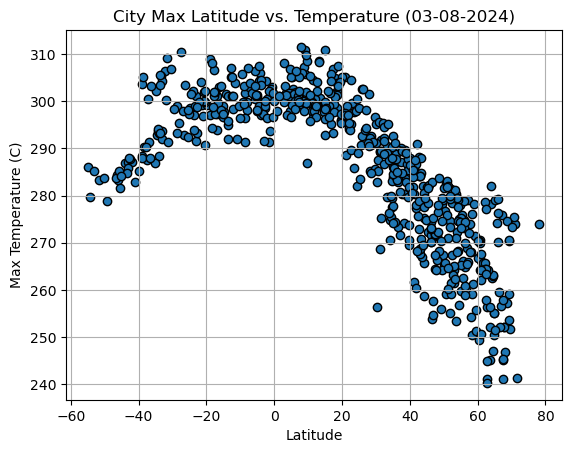

In [23]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (03-08-2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

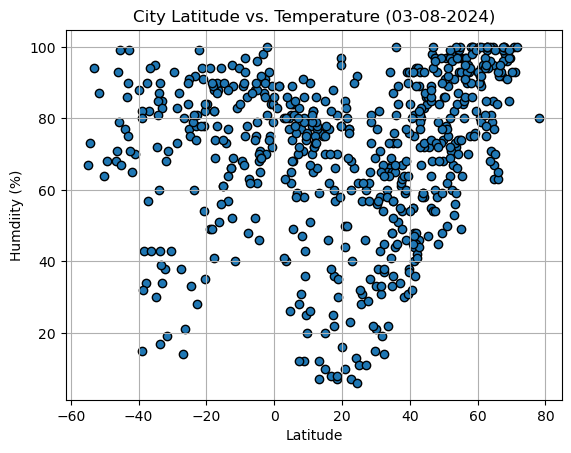

In [24]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humdiity (%)')
plt.title('City Latitude vs. Temperature (03-08-2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

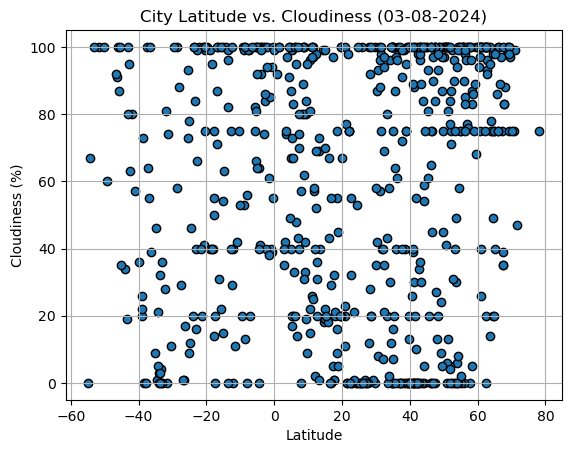

In [25]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (03-08-2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

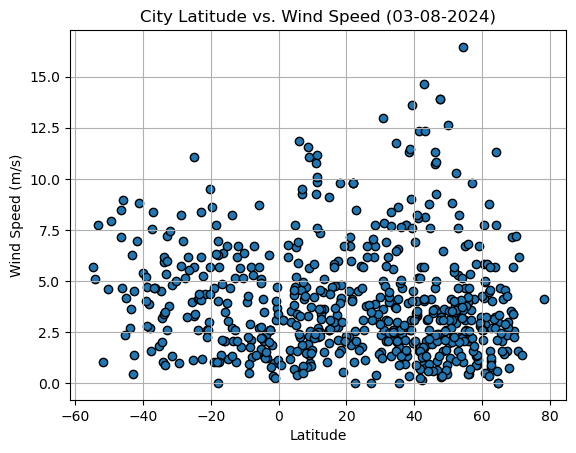

In [26]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (03-08-2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yeniseysk,58.4497,92.1703,250.34,100,87,0.89,RU,1709921137
2,badger,64.8000,-147.5333,255.03,63,75,0.00,US,1709921139
3,wailua homesteads,22.0669,-159.3780,294.12,77,75,9.77,US,1709921140
8,fairfield,41.2668,-73.3162,285.96,44,0,5.14,US,1709921146
10,bela,25.9333,81.9833,292.64,31,0,3.78,IN,1709921149


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,284.27,71,91,7.15,NZ,1709921136
4,trujillo,-8.1160,-79.0300,298.13,78,0,5.66,PE,1709921141
5,vanimo,-2.6741,141.3028,298.64,91,84,2.59,PG,1709921142
6,adamstown,-25.0660,-130.1015,298.22,77,9,3.29,PN,1709921144
7,port-aux-francais,-49.3500,70.2167,278.79,68,60,7.93,TF,1709921145


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7630747506792556


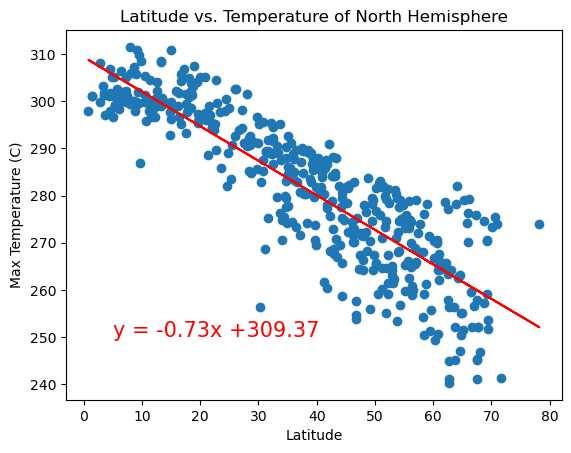

In [81]:
# Linear regression on Northern Hemisphere
x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values_north = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_north, y_values_north)
plt.plot(x_values_north, regress_values_north,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Latitude vs. Temperature of North Hemisphere")
plt.annotate(line_eq,(5,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.387825466038337


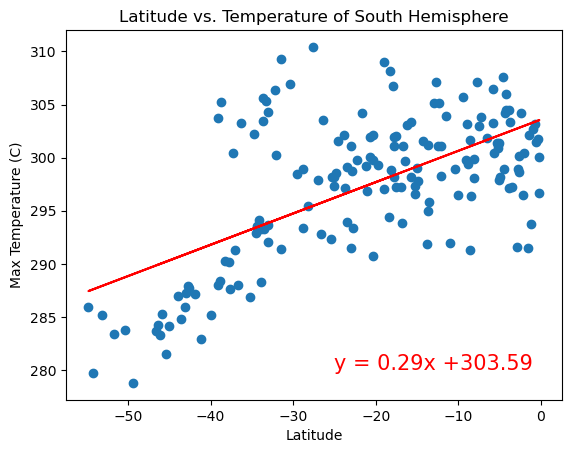

In [82]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values_south = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south, regress_values_south,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Latitude vs. Temperature of South Hemisphere")
plt.annotate(line_eq,(-25,280),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The linear regression plots show a positive relationship between the latitude and temp for north and a negative relationship for the south. As you get closer to the equator, the temperature rises which makes sense since the North and South Pole are some of the coldest places on the planet.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18789479617693192


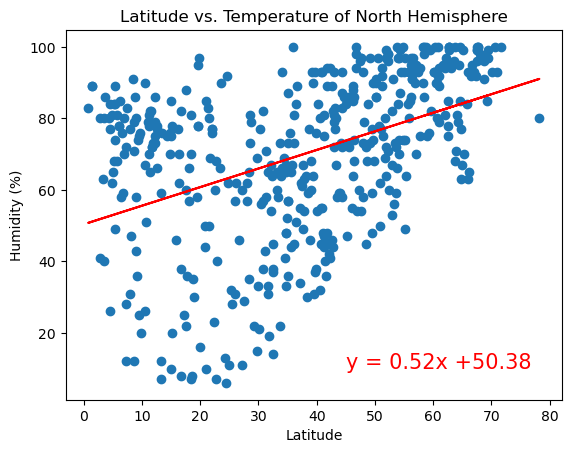

In [83]:
# Northern Hemisphere
x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values_north = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_north, y_values_north)
plt.plot(x_values_north, regress_values_north,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Temperature of North Hemisphere")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.02710435279727042


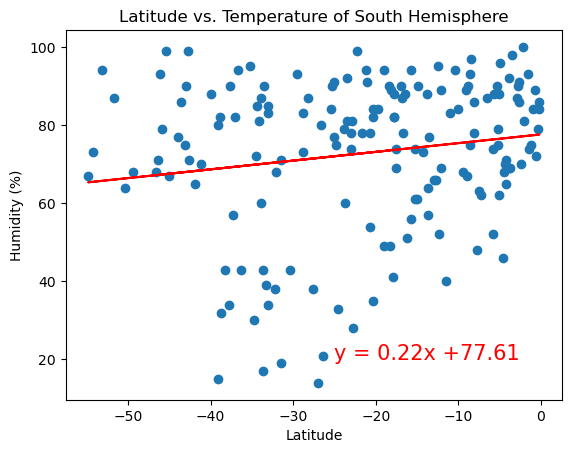

In [84]:
# Southern Hemisphere
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values_south = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south, regress_values_south,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Temperature of South Hemisphere")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The linear regression shows a positive relationship for the humidity and lattitude (near the poles). This is more apparent in the North Hemisphere data (greater slope). This is because saturation vapor pressure is low.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03981968705154084


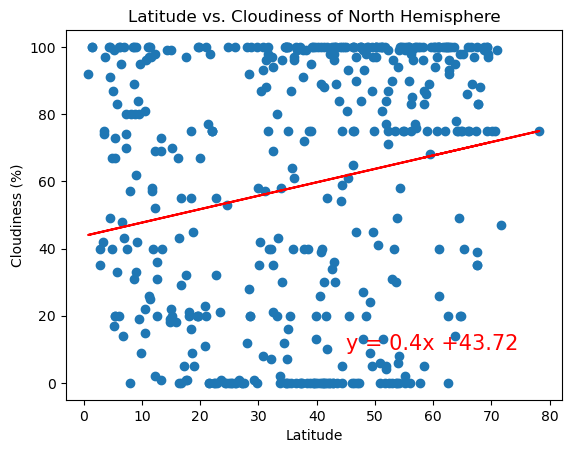

In [85]:
# Northern Hemisphere
x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values_north = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_north, y_values_north)
plt.plot(x_values_north, regress_values_north,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness of North Hemisphere")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.03760089674619235


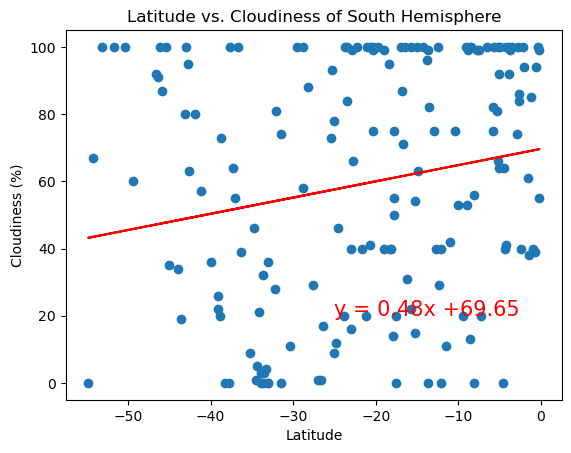

In [86]:
# Southern Hemisphere
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values_south = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south, regress_values_south,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness of South Hemisphere")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The linear regression also shows a positive relationship between cloudiness and lattitude possibly due to the reflection of sunlight off water which in turn can lead to the creation of more clouds.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0061547911781149


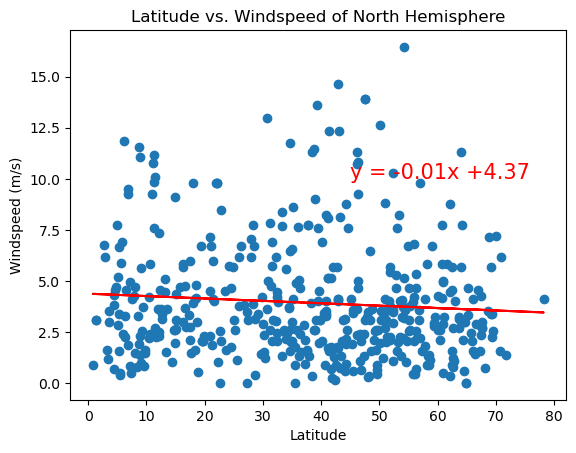

In [87]:
# Northern Hemisphere
x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north)
regress_values_north = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_north, y_values_north)
plt.plot(x_values_north, regress_values_north,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.title("Latitude vs. Windspeed of North Hemisphere")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.09338731252057603


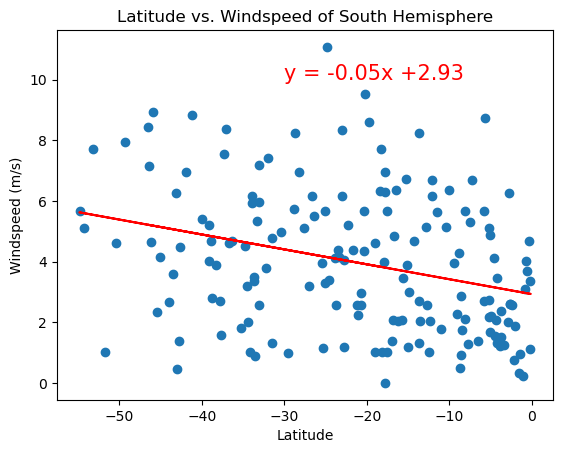

In [88]:
# Southern Hemisphere
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values_south)
regress_values_south = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_south, y_values_south)
plt.plot(x_values_south, regress_values_south,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.title("Latitude vs. Windspeed of South Hemisphere")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The linear relationship is negative for the wind speed and latitude meaning that it tends to decrease around the poles. This could be influenced by the global wind patterns, atmospheric circulation, and the Earth's rotation.